# HSQL sums and spider plots

## Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


## Load data

### Load data - Load areas of analysis

In [2]:
# Compu Alex
grl_dir = "../../../data/external/temporal_todocker/santiago/proximidad/"

alameda = gpd.read_file(grl_dir + "buffer_800m_nueva_alameda_32719.gpkg")
alameda = alameda.to_crs("EPSG:4326")

santiago_viv = gpd.read_file(grl_dir + "viviendas_por_tipo_mnz_32719.gpkg")
santiago_viv = santiago_viv.to_crs("EPSG:4326")

DriverError: ../../../data/external/temporal_todocker/santiago/proximidad/buffer_800m_nueva_alameda_32719.gpkg: No such file or directory

In [2]:
# Compu Edgar
grl_dir = "../../../data/processed/santiago/"

In [5]:
#santiago_aoi = aup.gdf_from_db('santiago_aoi','projects_research')

In [6]:
#poniente = gpd.read_file(grl_dir + 'alameda_poniente.gpkg')

In [7]:
#oriente = gpd.read_file(grl_dir + 'alameda_oriente.gpkg')

In [8]:
#alameda_ext = gpd.read_file(grl_dir + 'extended_alameda_800m_buffer.gpkg')

In [3]:
santiago_viv = gpd.read_file(grl_dir + "viv_area.gpkg")
santiago_viv = santiago_viv.to_crs("EPSG:4326")

In [4]:
alameda = gpd.read_file(grl_dir + "buffer 800m nueva alameda.shp")
alameda = alameda.to_crs("EPSG:4326")

### Load data - Load hexagons with proximity data

In [5]:
res8_query = 'SELECT * FROM projects_research.santiago_hexproximity_4_5_kmh WHERE res = 8'
hex8_gdf = aup.gdf_from_query(res8_query)

# Show
print(hex8_gdf.shape)
hex8_gdf.head(1)

(4291, 147)


,hex_id,geometry,supermercado_time,supermercado_count_15min,clinica_priv_time,clinica_priv_count_15min,clinica_pub_time,clinica_pub_count_15min,hospital_priv_time,hospital_priv_count_15min,...,errands_paperwork_count,fresh_air_count,living_count,culture_count,entertainment_count,enjoying_count,education_count,learning_count,sustainable_mobility_count,working_count
0,88b2c0b001fffff,"POLYGON ((-71.00896 -33.70843, -71.01339 -33.7...",105.780441,0.0,130.5914,0.0,90.375835,0.0,570.971609,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
res9_query = 'SELECT * FROM projects_research.santiago_hexproximity_4_5_kmh WHERE res = 9'
hex9_gdf = aup.gdf_from_query(res9_query)

# Show
print(hex9_gdf.shape)
hex9_gdf.head(1)

(30073, 147)


,hex_id,geometry,supermercado_time,supermercado_count_15min,clinica_priv_time,clinica_priv_count_15min,clinica_pub_time,clinica_pub_count_15min,hospital_priv_time,hospital_priv_count_15min,...,errands_paperwork_count,fresh_air_count,living_count,culture_count,entertainment_count,enjoying_count,education_count,learning_count,sustainable_mobility_count,working_count
0,89b2c555d6fffff,"POLYGON ((-70.68506 -33.47780, -70.68624 -33.4...",25.291604,0.0,34.67271,0.0,6.78164,1.147059,44.117349,0.0,...,0.020597,0.489852,0.510449,0.013164,0.016145,0.029309,0.365348,0.365348,1.291655,1.291655


### Load data - Load source matrix (summary base table)

In [7]:
df_summary = pd.read_csv(grl_dir + 'source_matrix.csv',encoding='utf-8') #encoding='iso-8859-1'
df_summary

,Function,Theme,Indicator,Variable,Source name
0,Supplies,GROCERIES,Specific supply,Butcher/Fish Shops,carniceria
1,Supplies,GROCERIES,Specific supply,Hardware/ Paint stores,hogar
2,Supplies,GROCERIES,Specific supply,Bakeries and delis,bakeries
3,Supplies,GROCERIES,General supply,Local and mini markets,local_mini_market
4,Supplies,GROCERIES,General supply,CIty fairs,ferias
5,Supplies,GROCERIES,General supply,Supermarkets,supermercado
6,Caring,HEALTH,Health care,Neighborhood clinics,clinica_priv
7,Caring,HEALTH,Health care,NaN,clinica_pub
8,Caring,HEALTH,Health care,Hospitals,hospital_priv
9,Caring,HEALTH,Health care,NaN,hospital_pub


## Pre-process data - Create HQSL

In [86]:
def calculate_hqsl(hex_gdf):
    # ------------------------------------------------------------
    # --- REQUIRED DATA: parameters dictionary 
    # Structure: {social_functions:{themes:[sources]}}
    parameters_dict = {'supplies':{'groceries':['carniceria','hogar','local_mini_market','bakeries','ferias','supermercado']},
                   'caring':{'health':['clinica_priv','clinica_pub','hospital_priv','hospital_pub','consult_ado_priv','consult_ado_pub','residencia_adumayor','farmacia'],
                            'exercise':['club_deportivo','eq_deportivo_pub','eq_deportivo_priv']},
                   'living':{'errands_paperwork':['civic_office','tax_collection','social_security','banco'],
                             'fresh_air':['ep_plaza_small','ep_plaza_big']},
                   'enjoying':{'culture':['museos_priv','museos_pub','bibliotecas','sitios_historicos'],
                               'entertainment':['cines','librerias','restaurantes_bar_cafe']},
                   'learning':{'education':['edu_basica_priv','edu_basica_pub','edu_media_priv','edu_media_pub','jardin_inf_pub','jardin_inf_priv','edu_especial_priv','edu_especial_pub']},
                   'working':{'sustainable_mobility':['ciclovias','paradas_tp','paradas_tp_tren','paradas_tp_metro']}}
    
    # scale count source values
    # proxhexs_countprocess = hex_gdf.copy()
    # scalar_count_column_list = []

    # ------------------------------------------------------------
    # --- NORMALIZE SOURCES (_scaledcount columns)
    for social_function in parameters_dict.keys():
        aup.log(f"--- {social_function}")
        for theme in parameters_dict[social_function]:
            aup.log(f"------ {theme}")
            for source in parameters_dict[social_function][theme]:

                # Set col name of interest and find min and max values
                count_colname = f"{source}_count_15min"
                hex_gdf[count_colname] = hex_gdf[count_colname] + 0.01
                min_val = np.log(hex_gdf[count_colname]).min()
                max_val = np.log(hex_gdf[count_colname]).max()
                print(f"for col {count_colname} max_val: {max_val} and min_val: {min_val}")
                print(f"for col {count_colname} max_val: {hex_gdf[count_colname].max()} and min_val: {hex_gdf[count_colname].min()}")
                # Calculate MinMax Scalar
                hex_gdf[f"{source}_scaledcount"] = hex_gdf[count_colname].apply(lambda x: 10 * ((np.log(x) - min_val) /(max_val - min_val)))
                # hex_gdf.loc[hex_gdf[f"{source}_scaledcount"]>100, f"{source}_scaledcount"] = 100
                aup.log(f"------ Scaled {source} count.")
                ''' # Drop original count col
                hex_gdf.drop(columns=[count_colname],inplace=True)
                # Add
                scalar_count_column_list.append(f"{source}_scaledcount")'''

    aup.log(f"--- Scaled count columns added to hex_gdf.")
    
    # Keep columns of interest only
    # proxhexs_countprocess = proxhexs_countprocess[['hex_id','geometry']+scalar_count_column_list+['res','city']]

    # ------------------------------------------------------------
    # --- SUM NORMALIZED SOURCES BY THEME AND BY SOCIAL FUNCTION
    aup.log(f"--- Starting social function analysis.")
    sum_count_column_list = []

    for social_function in parameters_dict.keys():
        # Set social function sources list
        sf_sources_list = []
        
        for theme in parameters_dict[social_function]:
            # Set theme_sources_list and feed sf_sources_list
            theme_sources_list = []
            for source in parameters_dict[social_function][theme]:
                theme_sources_list.append(f"{source}_scaledcount")
                sf_sources_list.append(f"{source}_scaledcount")

            
            # Find sum of count anlysis for theme
            hex_gdf[f"{theme}_count"] = hex_gdf[theme_sources_list].sum(axis=1)
            aup.log(f"------ Summed {theme} count with a mean value of " + str(round(hex_gdf[f"{theme}_count"].mean(),4)))
            sum_count_column_list.append(f"{theme}_count")
            
        # Find sum of count anlysis for social function
        hex_gdf[f"{social_function}_count"] = hex_gdf[sf_sources_list].sum(axis=1)
        aup.log(f"--- Summed {social_function} count with a mean value of {round(hex_gdf[f'{social_function}_count'].mean(),4)}.")
        sum_count_column_list.append(f"{social_function}_count")

    # ------------------------------------------------------------
    # --- NORMALIZE SOCIAL FUNCTION COLUMNS AND CREATE HQLS
    # Get social function count columns
    social_fn_cols = []
    for k in parameters_dict.keys():
        social_fn_cols.append(k+'_count')

    # Normalize social function columns before creating HQSL
    for sc in social_fn_cols:
        aup.log(f"--- Normalized social function {sc} from 0 to 30.")
        hex_gdf[sc] = 30 * (hex_gdf[sc] - hex_gdf[sc].min()) / (hex_gdf[sc].max() - hex_gdf[sc].min())

    # Create HQSL
    hex_gdf['hqsl'] = hex_gdf[social_fn_cols[0]] + hex_gdf[social_fn_cols[1]] + hex_gdf[social_fn_cols[2]] + hex_gdf[social_fn_cols[3]] + hex_gdf[social_fn_cols[4]] + hex_gdf[social_fn_cols[5]]
    aup.log(f"--- Calculated HQSL with a mean value of {round(hex_gdf['hqsl'].mean(),4)}.")
    
    return hex_gdf

In [87]:
hex_gdf = hex9_gdf.copy()

In [88]:
hex_gdf = calculate_hqsl(hex_gdf)

for col carniceria_count_15min max_val: 2.303584593327129 and min_val: -4.605170185988091
for col carniceria_count_15min max_val: 10.01 and min_val: 0.01
for col hogar_count_15min max_val: 3.2962071678045244 and min_val: -4.605170185988091
for col hogar_count_15min max_val: 27.01 and min_val: 0.01
for col local_mini_market_count_15min max_val: 4.545638059286748 and min_val: -4.605170185988091
for col local_mini_market_count_15min max_val: 94.22052631578948 and min_val: 0.01
for col bakeries_count_15min max_val: 3.919255610498369 and min_val: -4.605170185988091
for col bakeries_count_15min max_val: 50.362941176470585 and min_val: 0.01
for col ferias_count_15min max_val: 2.125450062887391 and min_val: -4.605170185988091
for col ferias_count_15min max_val: 8.376666666666667 and min_val: 0.01
for col supermercado_count_15min max_val: 2.683634900484669 and min_val: -4.605170185988091
for col supermercado_count_15min max_val: 14.638205128205128 and min_val: 0.01
for col clinica_priv_count_15

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


In [26]:
import seaborn as sns

In [27]:
import numpy as np
#E.g log_2(8) 

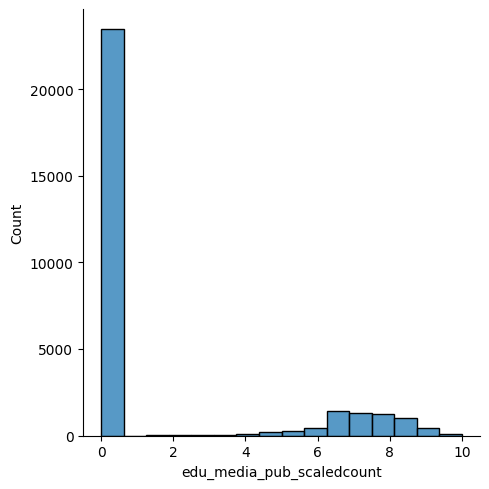

In [28]:
sns.displot(hex_gdf, x="edu_media_pub_scaledcount")

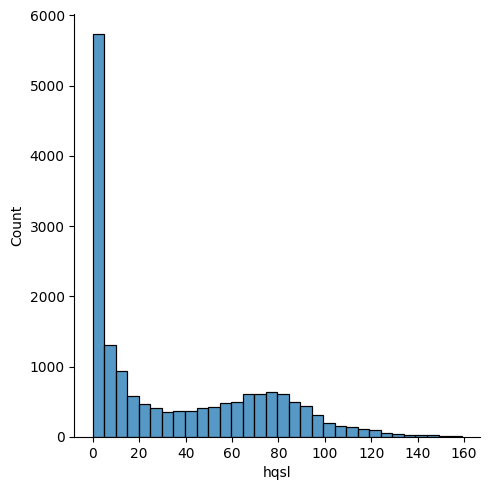

In [29]:
sns.displot(hex_gdf.loc[hex_gdf.supermercado_time>0],
            x=hex_gdf.loc[hex_gdf.supermercado_time>0,"hqsl"])

<AxesSubplot: >

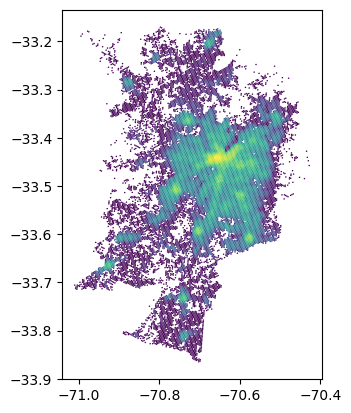

In [30]:
hex_gdf.loc[hex_gdf.supermercado_time>0].plot('hqsl')

## __Show and save some statistical data + create polar plots__

### Base data required - Social functions columns

##### Get social function count columns

In [31]:
parameters_dict = {'supplies':{'groceries':['carniceria','hogar','local_mini_market','ferias','supermercado']},
                   'caring':{'health':['clinica_priv','clinica_pub','hospital_priv','hospital_pub','consult_ado_priv','consult_ado_pub','residencia_adumayor','farmacia'],
                            'exercise':['club_deportivo','eq_deportivo_pub','eq_deportivo_priv']},
                   'living':{'errands_paperwork':['civic_office','tax_collection','social_security','banco'],
                             'fresh_air':['ep_plaza_small','ep_plaza_big']},
                   'enjoying':{'culture':['museos_priv','museos_pub','bibliotecas','sitios_historicos'],
                               'entertainment':['cines','librerias','restaurantes_bar_cafe']},
                   'learning':{'education':['edu_basica_priv','edu_basica_pub','edu_media_priv','edu_media_pub','jardin_inf_pub','jardin_inf_priv','edu_especial_priv','edu_especial_pub']},
                   'working':{'sustainable_mobility':['ciclovias','paradas_tp','paradas_tp_tren','paradas_tp_metro']}}

social_fn_cols = []

for k in parameters_dict.keys():
    social_fn_cols.append(k+'_count')

# Show
social_fn_cols

['supplies_count',
 'caring_count',
 'living_count',
 'enjoying_count',
 'learning_count',
 'working_count']

### Show statistical data

##### Show statistical summary (__All data__)

In [32]:
summary_cols = social_fn_cols
if 'hqsl' not in summary_cols:
    summary_cols.append('hqsl')

hex_gdf[summary_cols].describe()

,supplies_count,caring_count,living_count,enjoying_count,learning_count,working_count,hqsl
count,30073.000000,30073.000000,30073.000000,30073.000000,30073.000000,30073.000000,30073.000000
mean,4.554311,2.887511,3.481070,1.369382,3.771651,3.812316,19.876240
std,8.014765,5.166362,5.728209,3.091914,6.444185,6.238148,32.788172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.208341,3.775676,7.339519,1.852524,5.574779,5.593758,29.396039
max,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,158.928493


##### Show res value by source name (__All data__)

In [33]:
df_summary['res_value'] = np.nan

for source in df_summary['Source name']:
    if pd.isna(source):
        continue
    for col in hex_gdf.columns:
        if source in col and 'scaled' in col:
            df_summary.loc[df_summary['Source name']==source, 'res_value'] = hex_gdf[col].mean()
df_summary

,Function,Theme,Indicator,Variable,Source name,res_value
0,Supplies,GROCERIES,Specific supply,Butcher/Fish Shops,carniceria,1.225349
1,Supplies,GROCERIES,Specific supply,Hardware/ Paint stores,hogar,1.210019
2,Supplies,GROCERIES,Specific supply,Bakeries and delis,bakeries,1.358125
3,Supplies,GROCERIES,General supply,Local and mini markets,local_mini_market,1.480817
4,Supplies,GROCERIES,General supply,CIty fairs,ferias,1.566653
5,Supplies,GROCERIES,General supply,Supermarkets,supermercado,1.415400
6,Caring,HEALTH,Health care,Neighborhood clinics,clinica_priv,0.602372
7,Caring,HEALTH,Health care,NaN,clinica_pub,1.248087
8,Caring,HEALTH,Health care,Hospitals,hospital_priv,0.051319
9,Caring,HEALTH,Health care,NaN,hospital_pub,0.163358


## Filter data by spatial area (For Spider plots)

#### __Select area of interest manually!__

In [48]:
# 'Santiago_alameda' or 'Santiago_household'
area = 'Santiago_alameda'

In [49]:
if area == 'Santiago_household':
    aoi = santiago_viv.to_crs("EPSG:4326")
elif area == 'Santiago_alameda':
    aoi = alameda.to_crs("EPSG:4326")

##### Clip hexagons to spatial area

In [50]:
# Get hexs area
hex_gdf['area_ha'] = hex_gdf.to_crs("EPSG:32719").area / 10000
# Clip hexagons to spatial area of interest
hex_clip = gpd.clip(hex_gdf, aoi)
# Keep hexs only if at least 10% of hex inside area of interest
hex_clip['area_clip'] = hex_clip.to_crs("EPSG:32719").area / 10000
hex_clip['area_pct'] = hex_clip['area_clip'] / hex_clip['area_ha']
hex_clip = hex_clip.loc[hex_clip.area_pct>=0.1].copy()
# Create gdf for current spatial area of interest
hex_list = list(hex_clip.hex_id.unique())
hex_spatial = hex_gdf.loc[hex_gdf.hex_id.isin(hex_list)].copy()

<AxesSubplot: >

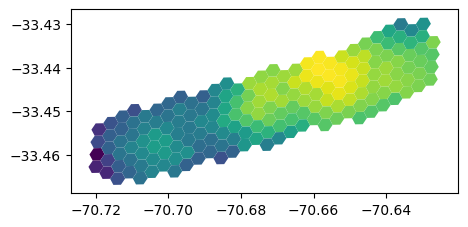

In [51]:
hex_spatial.plot('hqsl')

##### Show statistical summary (__Selected spatial area only__)

In [52]:
hex_spatial[summary_cols].describe()

,supplies_count,caring_count,living_count,enjoying_count,learning_count,working_count,hqsl
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,24.779030,18.390176,20.930416,16.708869,17.935247,22.842641,121.586379
std,3.442422,4.857434,4.780734,8.350320,4.739226,3.199540,23.469478
min,9.277944,6.346812,8.637885,1.978374,9.395929,12.854605,58.715169
25%,22.592741,14.952401,18.010498,10.823070,13.824358,20.448805,100.864680
50%,25.611987,18.961752,20.404848,17.321931,16.916171,22.930453,127.118777
75%,27.318654,22.171135,24.010877,22.405293,21.331683,23.813982,140.954019
max,30.000000,27.197004,30.000000,30.000000,30.000000,30.000000,158.928493


##### Show res value by source name (__Selected spatial area only__)

In [53]:
df_summary['res_value'] = np.nan

for source in df_summary['Source name']:
    if pd.isna(source):
        continue
    for col in hex_spatial.columns:
        if source in col and 'scaled' in col:
            df_summary.loc[df_summary['Source name']==source, 'res_value'] = hex_spatial[col].mean()
df_summary

,Function,Theme,Indicator,Variable,Source name,res_value
0,Supplies,GROCERIES,Specific supply,Butcher/Fish Shops,carniceria,7.411510
1,Supplies,GROCERIES,Specific supply,Hardware/ Paint stores,hogar,6.728758
2,Supplies,GROCERIES,Specific supply,Bakeries and delis,bakeries,7.992309
3,Supplies,GROCERIES,General supply,Local and mini markets,local_mini_market,8.319169
4,Supplies,GROCERIES,General supply,CIty fairs,ferias,7.132894
5,Supplies,GROCERIES,General supply,Supermarkets,supermercado,7.336468
6,Caring,HEALTH,Health care,Neighborhood clinics,clinica_priv,7.076137
7,Caring,HEALTH,Health care,NaN,clinica_pub,4.212172
8,Caring,HEALTH,Health care,Hospitals,hospital_priv,3.486593
9,Caring,HEALTH,Health care,NaN,hospital_pub,2.590948


#### __Save data (hex_spatial)__

In [61]:
# Name that would be used to distinguish between what was already uploaded and
# new processing considering Min and Maxs from hex res 8.
# Delete if not needed
area_name = "Alameda"

# Save gdf
hex_spatial.to_file(f'../../../output/data/santiago/SocialFunctions_log_{area_name}.geojson')

## Polar plots (spatial area)

In [62]:
import textwrap
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D
import math #importing the math functions
import matplotlib.pyplot as plt

### Spatial area polar plot - Shows all social functions

In [63]:
pi = math.pi

In [64]:
gdf_polar = hex_spatial[social_fn_cols].mean(axis=0)
gdf_polar

supplies_count     24.779030
caring_count       18.390176
living_count       20.930416
enjoying_count     16.708869
learning_count     17.935247
working_count      22.842641
hqsl              121.586379
dtype: float64

In [65]:
df = gdf_polar.copy()
df = pd.DataFrame(df).reset_index()
df.index = [0]*len(df)
df = df.rename(columns={'index':'social_fn',0:'value'})
df = df.pivot(columns='social_fn', values='value')
df

social_fn,caring_count,enjoying_count,hqsl,learning_count,living_count,supplies_count,working_count
0,18.390176,16.708869,121.586379,17.935247,20.930416,24.77903,22.842641


In [81]:
def wrap_labels(ax, width, rotation, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=rotation, )

def make_spider(df, row, color, title, alpha, linewidth, zorder):
    
    categories=list(df)[0:]
    N = len(categories)

    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
     
    plt.rc('figure', figsize=(5, 5), )
 
    ax = plt.subplot(1,1,1, polar=True, )
 
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
   
    plt.xticks(angles[:-1], categories, color='black', size=8,zorder=10)
    ax.tick_params(axis='x', rotation=0,pad=10, zorder=10)
    # ax.set_xlabel(labelpad=10)
    
    ax.set_rlabel_position(0)
    plt.yticks([1,5,10,15,20,25,30], ['1','5','10','15','20','25','30'], color="black", size=10, zorder=10)
    plt.ylim(0,30)
     
    
    values=df.reset_index().loc[row].values.tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=linewidth, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = alpha, zorder=zorder)
         
    wrap_labels(ax, 15, 0)
  
    title = "Radar showing performance in each subject for "+ title
    plt.title(title, fontsize=10, x = 0.5, y = 1.1)

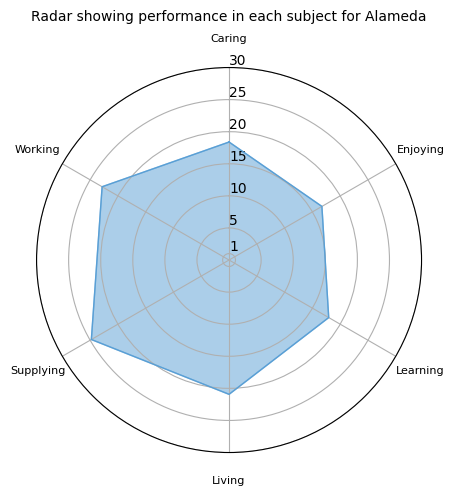

In [82]:
plt.figure()

color = '#599fd5'
df = df.rename(columns={'caring_count':'Caring',
                       'working_count':'Working',
                       'enjoying_count':'Enjoying',
                       'supplies_count':'Supplying',
                        'living_count':'Living',
                        'learning_count':'Learning'})
make_spider(row=0, df = df.drop(columns='hqsl'), title =area_name, 
            color = color, alpha=0.5, linewidth=1, zorder=-1)

plt.savefig(f'../../../output/figures/santiago/SocialFunctions_log_{area_name}.svg')

### Spatial area polar graph - Shows each social function's sources

# Older Notebook code

### Pre-process data - Normalize data by social function before creating HQSL

In [24]:
# Use hex8_gdf values as min/max values instead of hex9_gdf values?
use_hex8 = True

In [23]:
hex_gdf = hex9_gdf.copy()
for sc in social_fn_cols:
    if use_hex8:
        hex_gdf[sc] = 5 * (hex_gdf[sc] - hex8_gdf[sc].min()) / (hex8_gdf[sc].max() - hex8_gdf[sc].min())
    else:
        hex_gdf[sc] = 5 * (hex_gdf[sc] - hex_gdf[sc].min()) / (hex_gdf[sc].max() - hex_gdf[sc].min())

# Show
print(hex_gdf.shape)
hex_gdf.head(1)

(30073, 147)


,hex_id,geometry,supermercado_time,supermercado_count_15min,clinica_priv_time,clinica_priv_count_15min,clinica_pub_time,clinica_pub_count_15min,hospital_priv_time,hospital_priv_count_15min,...,errands_paperwork_count,fresh_air_count,living_count,culture_count,entertainment_count,enjoying_count,education_count,learning_count,sustainable_mobility_count,working_count
0,89b2c555d6fffff,"POLYGON ((-70.68506 -33.47780, -70.68624 -33.4...",25.291604,0.0,34.67271,0.0,6.78164,1.147059,44.117349,0.0,...,0.020597,0.489852,0.603321,0.013164,0.016145,0.026191,0.365348,0.410306,1.291655,2.530158


### Pre-process data - Create HQSL

<Axes: >

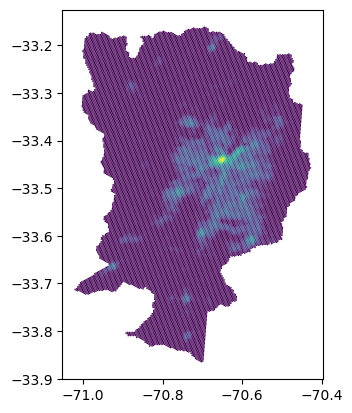

In [25]:
hex_gdf['hqsl'] = hex_gdf[social_fn_cols[0]] + hex_gdf[social_fn_cols[1]] + hex_gdf[social_fn_cols[2]] + hex_gdf[social_fn_cols[3]] + hex_gdf[social_fn_cols[4]] + hex_gdf[social_fn_cols[5]]
hex_gdf.plot('hqsl')

<AxesSubplot: >

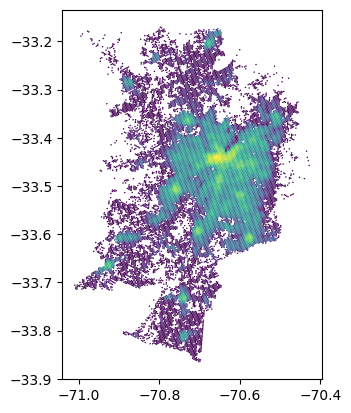

In [73]:
hex_gdf = hex_gdf.loc[hex_gdf.supermercado_time>0].copy()
hex_gdf.plot('hqsl')